In [7]:
import cv2
!pip install easygui
import easygui as easygui
import numpy as np
import imageio
import matplotlib.pyplot as plt
import sys
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image


In [8]:
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

TclError: ignored

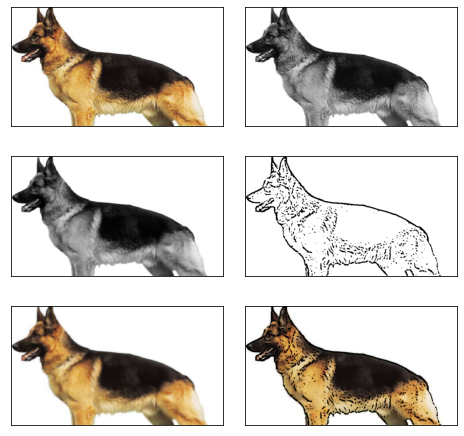

In [19]:
ImagePath="/content/sample_data/German-shepherd.jpg"
cartoonify(ImagePath)

In [18]:
def cartoonify(Imagepath):
  OriginalImage=cv2.imread(ImagePath)
  OriginalImage=cv2.cvtColor(OriginalImage,cv2.COLOR_BGR2RGB)
  if OriginalImage is None:
    print("Cannot find any file!! please upload an appropriate file")
    sys.exit()

  Resized1=cv2.resize(OriginalImage, (960, 540))  

  #print(OriginalImage)

  graysacleImage=cv2.cvtColor(OriginalImage,cv2.COLOR_BGR2GRAY)
  Resized2=cv2.resize(graysacleImage,(960,540))

  #plt.imshow(Resized2, cmap='gray')

  smoothscaleImage=cv2.medianBlur(graysacleImage,5)
  Resized3=cv2.resize(smoothscaleImage, (960,540))
  #plt.imshow(Resized3, cmap='gray')

  getedge=cv2.adaptiveThreshold(smoothscaleImage,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 9,9)
  Resized4=cv2.resize(getedge,(960,540))
  #plt.imshow(Resized4,cmap='gray')

  colorImage=cv2.bilateralFilter(OriginalImage, 9 ,300,300)
  Resized5=cv2.resize(colorImage,(960,540))
  #plt.imshow(Resized5,cmap='gray')

  cartoonImage=cv2.bitwise_and(colorImage, colorImage, mask=getedge)
  Resized6=cv2.resize(cartoonImage, (960,540))
  #plt.imshow(Resized6,cmap='gray')

  image=[Resized1,Resized2,Resized3,Resized4,Resized5,Resized6]
  fig, axes=plt.subplots(3,2,figsize=(8,8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))

  for i, ax in enumerate(axes.flat):
    ax.imshow(image[i], cmap='gray')

  plt.show()

In [3]:
def save(Resized6,Imagepath):
  newname='CartoonifiedImage'
  path1=os.path.dirname(Imagepath)
  extension=os.path.splitext(Imagepath)[1]
  path=os.path.join(path1,newname+extension)
  cv2.imwrite(path,cv2.cvtcolor(Resized6,cv2.COLOR_RGB2BGR))
  I="image saved by name " +newname +" at "+ path
  tk.messagebox.showinfo(title=none, message=I)


In [ ]:

upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()

In [11]:
upload

<function __main__.upload>